<a href="https://colab.research.google.com/github/JSini/tensorflow/blob/main/basics/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] ='2'

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

Data

In [3]:
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [4]:
print(train_images.shape, test_images.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [5]:
train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Normalize data

In [6]:
train_images, test_images = train_images/255.0, test_images/255.0

In [7]:
class_names =  ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
def show():
  plt.figure(figsize=(10,5))
  for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
  plt.show()

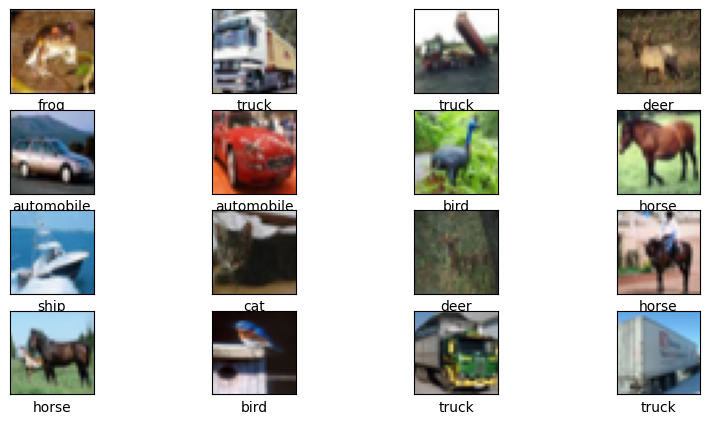

In [9]:
show()

In [10]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(32,32, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(32,32, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))  #not adding softmax here as we ae applying from_logits under loss
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)                7

Model Compiling

In [11]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opt = tf.keras.optimizers.Adam()
metrics=['accuracy']

model.compile(loss=loss, optimizer=opt, metrics=metrics)

Model Training

In [12]:
##model training
batch_size=64
epochs = 5

model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, verbose=2)


Epoch 1/5
782/782 - 54s - loss: 1.5246 - accuracy: 0.4516 - 54s/epoch - 69ms/step
Epoch 2/5
782/782 - 54s - loss: 1.2004 - accuracy: 0.5790 - 54s/epoch - 69ms/step
Epoch 3/5
782/782 - 52s - loss: 1.0824 - accuracy: 0.6199 - 52s/epoch - 66ms/step
Epoch 4/5
782/782 - 51s - loss: 1.0012 - accuracy: 0.6506 - 51s/epoch - 66ms/step
Epoch 5/5
782/782 - 52s - loss: 0.9457 - accuracy: 0.6705 - 52s/epoch - 66ms/step


In [13]:
model.evaluate(test_images, test_labels, batch_size=batch_size, verbose=2)

157/157 - 4s - loss: 0.9684 - accuracy: 0.6632 - 4s/epoch - 25ms/step


[0.9684250950813293, 0.6632000207901001]